# Golub Data Analysis

In Question 1 and 2 we are going to work with a filtered version of the `Golub et al.` dataset, a gene expression data sets with 72 leukemia samples and 3571 genes. The data files are available at https://drive.google.com/drive/u/0/folders/1RRz8NULsJXGxofMnpG2IrbngK9YvlFuU.

Note that we can directly read the file from the url:

`https://drive.google.com/uc?id=<file_id>`

The `file_id` can be found in the url of the shared link.

The data are obtained from the R package `cancerclass`. More information can be found here: https://rdrr.io/bioc/cancerclass/man/GOLUB.html

In [1]:
import pandas as pd
dat = pd.read_csv('https://drive.google.com/uc?id=1tDcn2fIO5A223ZZGMwRWfILuHi5QJCpR', header=None, index_col=0, delimiter='\t')
meta = pd.read_csv('https://drive.google.com/uc?id=1JGASmoEkHMIE0QvqmDfNXTCpeJBra088', header=0, delimiter='\t')

In [2]:
dat.shape

(3571, 72)

In [3]:
meta.head()
meta.columns

Index(['class', 'sample', 'type', 'FAB', 'gender'], dtype='object')

## Question 1
Perform hierarchical clustering of the 72 samples based on their **gene expression values**, with Euclidean distance as dissimilarity measure. Plot the dendrogram for single, complete and average linkages.

Hint: You may want to use the `linkage` and `dendrogram` functions from `scipy.cluster.hierarchy`.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 11.1 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1


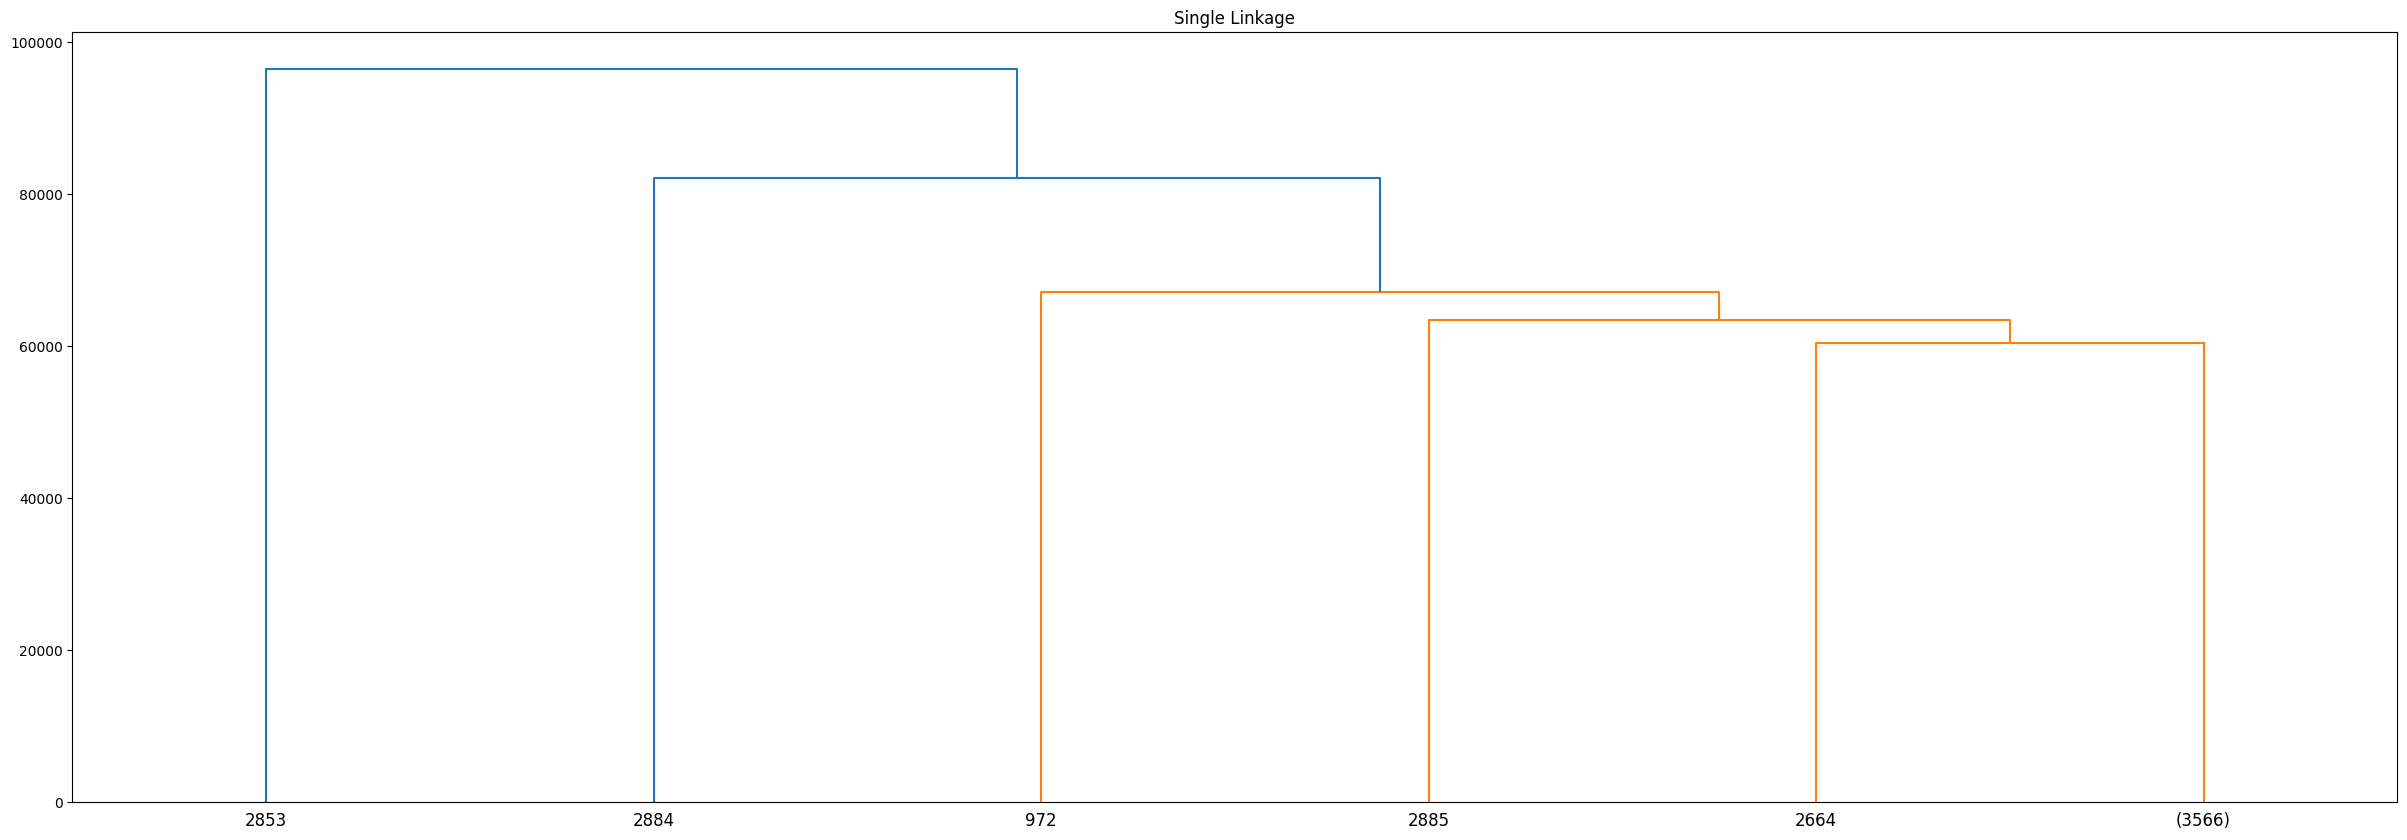

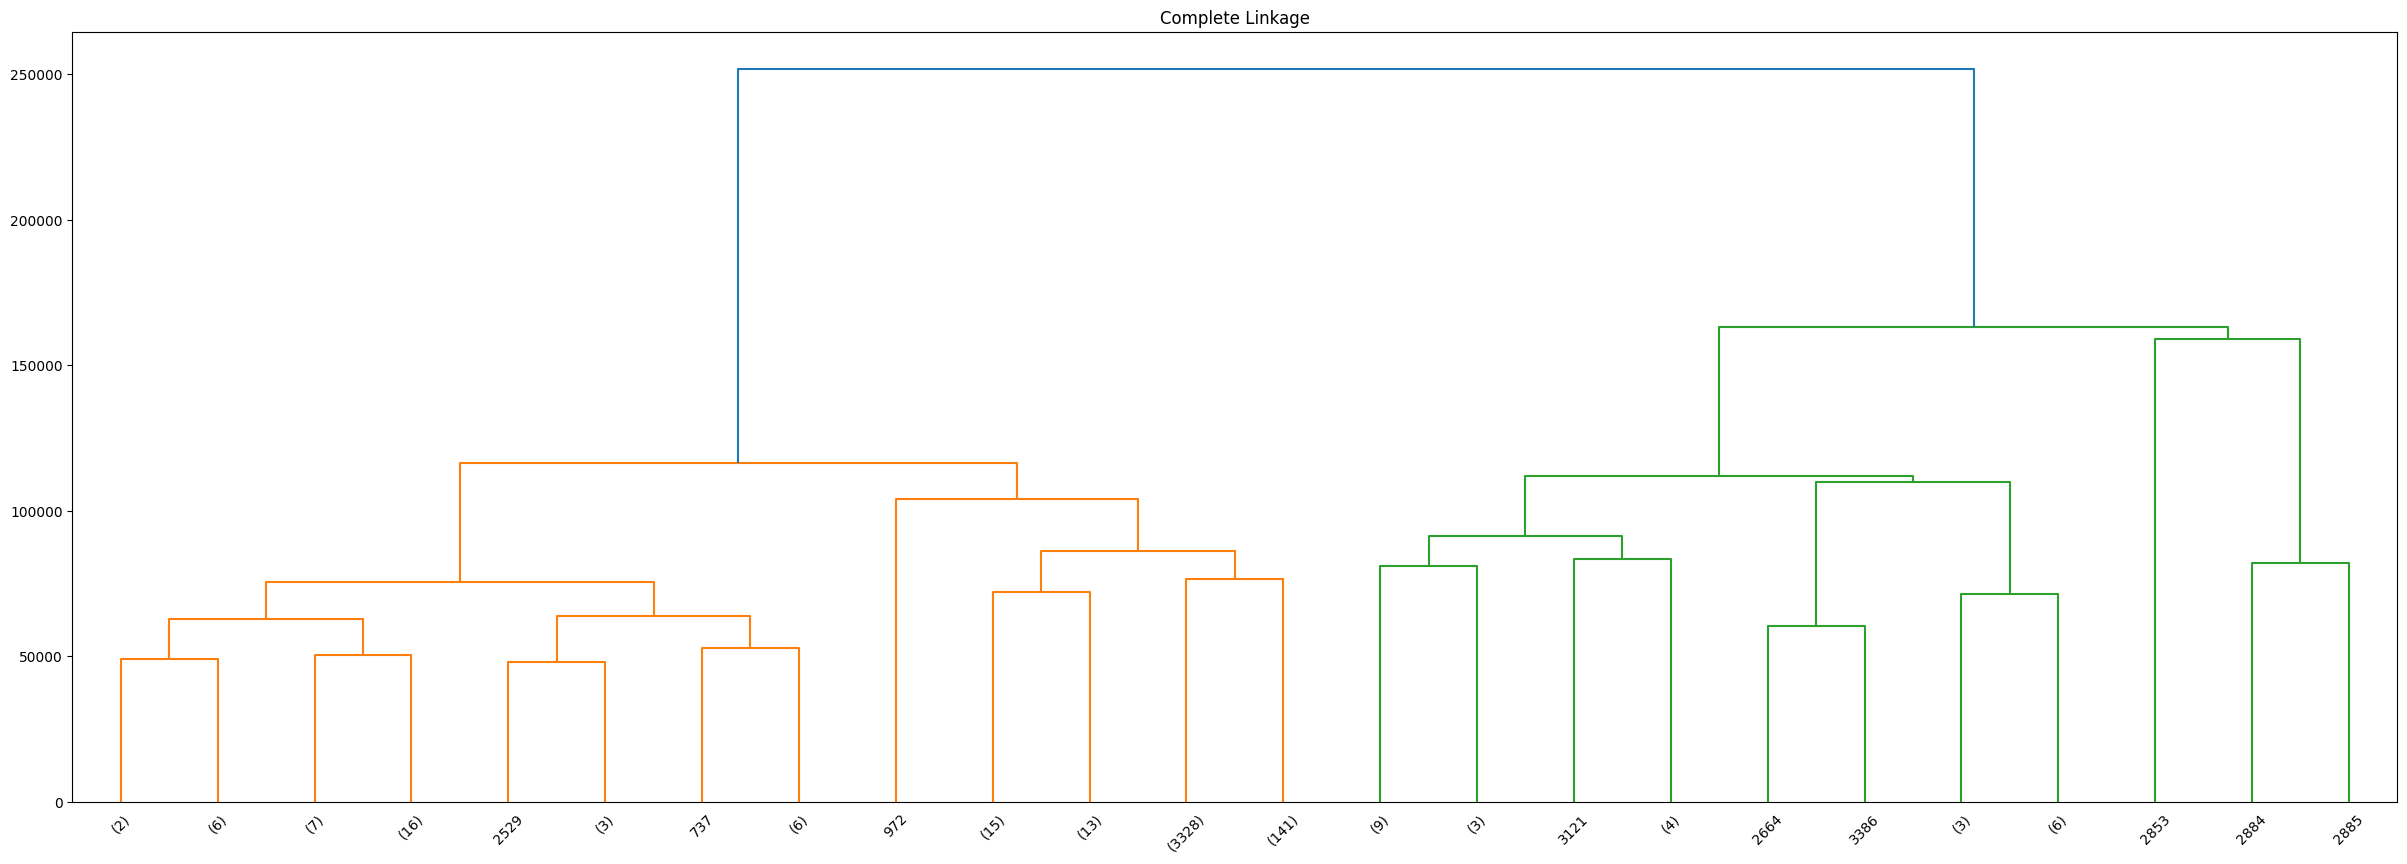

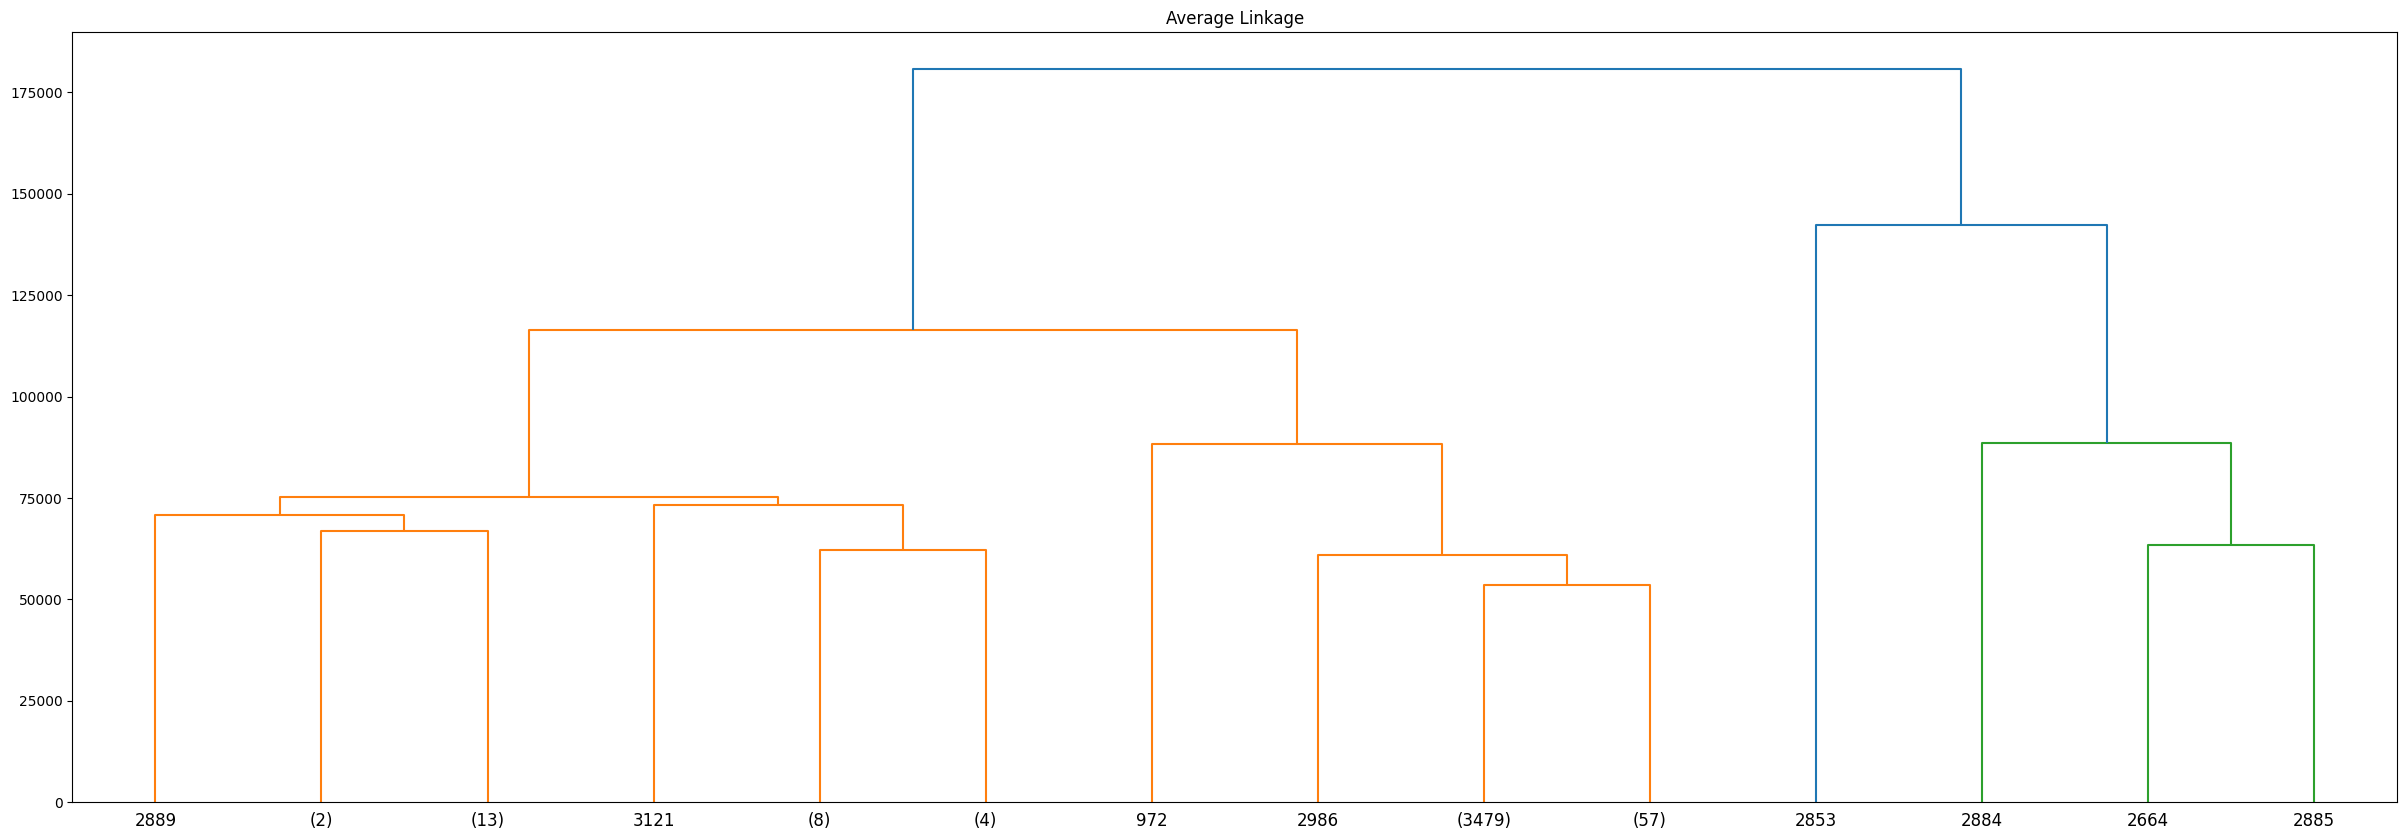

In [4]:
# Install packages
!pip install scipy==1.11.3
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot as plt

# Single linkage
Z_single = sch.linkage(dat, method='single', metric='euclidean')
plt.figure(figsize=(30, 10))
sch.dendrogram(Z_single, truncate_mode='level', p=4) # Added truncate_mode='level' and p=4
plt.title('Single Linkage')
plt.show()
# Complete linkage
Z_complete = sch.linkage(dat, method='complete', metric='euclidean')
plt.figure(figsize=(30, 10))
sch.dendrogram(Z_complete, truncate_mode='level', p=4) # Added truncate_mode='level' and p=4
plt.title('Complete Linkage')
plt.show()
# Average linkage
Z_average = sch.linkage(dat, method='average', metric='euclidean')
plt.figure(figsize=(30, 10))
sch.dendrogram(Z_average, truncate_mode='level', p=4) # Added truncate_mode='level' and p=4
plt.title('Average Linkage')
plt.show()

## Question 2

We already know that there are two types of cancer samples in the dataset: Acute Lymphocytic Leukemia (ALL and AML) and Acute Myeloid Leukemia. The type of each sample can be found in the meta data. In the lecture we mentioned that after hierarchical clustering, we can get cluster assignments by cutting the dendrogram at a certain height. The `scipy.cluster.hierarchy.cut_tree` function can do this for us. Now, suppose we cut the dendrogram with **complete linkage** into **two** branches, generate a contigency table of cluster assignments and the actual cancer type.

Hint: We covered contigency tables in demo of lecture 2.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
import seaborn as sns

#Perform hierarchical clustering using complete linkage
gene_expression_data = dat.values  # Gene expression values
Z_complete = linkage(gene_expression_data.T, method='complete', metric='euclidean')

#Cut the dendrogram to obtain cluster assignments
cluster_assignments = cut_tree(Z_complete, n_clusters=2).flatten()

#Create a contingency table
# Here we assume that the samples in 'meta' are ordered the same as in 'dat.columns'
meta['cluster'] = cluster_assignments

#Create a contingency table
contingency_table = pd.crosstab(meta['cluster'], meta['class'], rownames=['Cluster'], colnames=['Cancer Type'])
print(contingency_table)


Cancer Type  ALL  AML
Cluster              
0             41    3
1              6   22


# MNIST Data Analysis

In questions 3 and 4 we are going to use the `MNIST` hand written digits data.

The `MNIST` (Mixed National Institute of Standards and Technology) data contain 60,000 training examples and 10,000 testing examples of handwritten digit images.  Due to its popularity in performance testing, it has been recognized as "the Drosophila of machine learning". In the following questions, we ask you to apply some clustering methods to a subset (n=1000) of the MNIST data.  

Each sample contains 784 integers ranging from $0$ to $255$, representing intensity value of a $28 \times 28$ image, one number for one pixel. To conveniently run the clustering functions, the square pixel matrix is flattened into the row vector, from left to right, top to bottom, with the first element of the vector corresponds to the upper left pixel. The label vector is a 1000-element array containing the true class of the samples.

In [6]:
from tensorflow.keras.datasets import mnist
_ , (dat, lab) = mnist.load_data()  # use the first 1000 images in the test set of MNIST
dat = dat[0:1000,:,:].reshape((1000, 28*28))  # flatten the image for the convenient of downstream analysis
lab = lab[0:1000]
print(f'Data dimension: {dat.shape}')
print(f'First 10 labels: {lab[0:10]}')

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Data dimension: (1000, 784)
First 10 labels: [7 2 1 0 4 1 4 9 5 9]


Once the data are ready, we can quickly try visualizing a digit image:

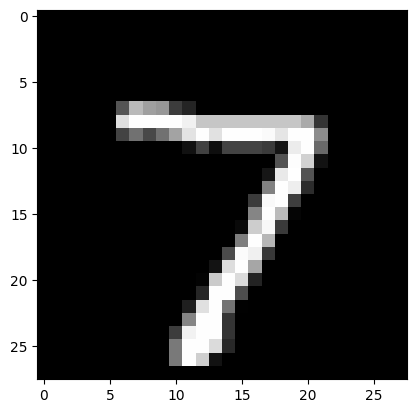

In [7]:
import matplotlib.pyplot as plt
im = dat[0,:]
im = im.reshape((28, 28))
plt.imshow(im, cmap='gray')

## Question 3
Run the K-means algorithm with $k=10$ to cluster **all of the 1000 images**  into 10 groups. You may want to run mutiple times with random initiation and pick a solution with the smallest within-cluster sum of squares. Visualize the cluster centers (centroids) as ten $28 \times 28$ images.

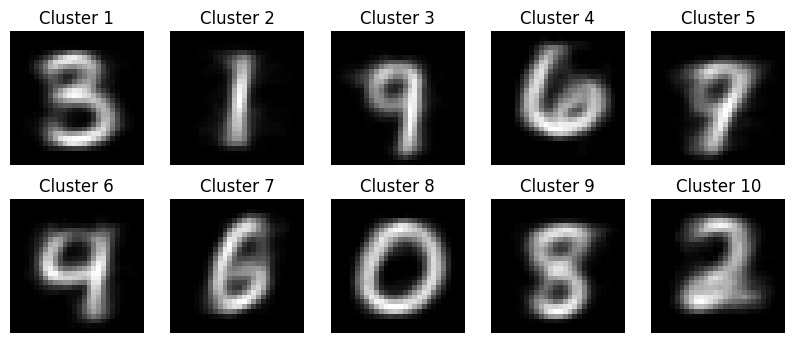

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Flatten each image (28x28) into a vector of 784 values
images_flat = dat.reshape(1000, 28*28)

# Run KMeans with k=10 and n_init=55 for multiple random initializations
kmeans = KMeans(n_clusters=10, n_init=55, random_state=5694)
kmeans.fit(images_flat)

# Get the cluster centers of centroids
centroids = kmeans.cluster_centers_

# Reshape the centroids back to 28x28 images
centroids_images = centroids.reshape(10, 28, 28)

# Visualize the 10 centroids as images
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)  # 2 rows, 5 columns
    plt.imshow(centroids_images[i], cmap='gray')
    plt.axis('off')
    plt.title(f'Cluster {i+1}')
plt.show()

## Question 4
Try DBSCAN algorithm on the 1000 digits with **Pearson correlation** distance as the dissimilarity measure. For density clustering, it is helpful to look at the distribution of k-nearest neighbor distance in the data. Here we try $k=5$. Generate a sorted 5-NN distance plot similar to the plot on slide 31 of the lecture note.

Run DBSCAN with $\epsilon = 0.5$ and minimal number of samples in neiboughhood as 5. How many clusters do you get? Again, does this result make sense to you? If not, any thoughts why?

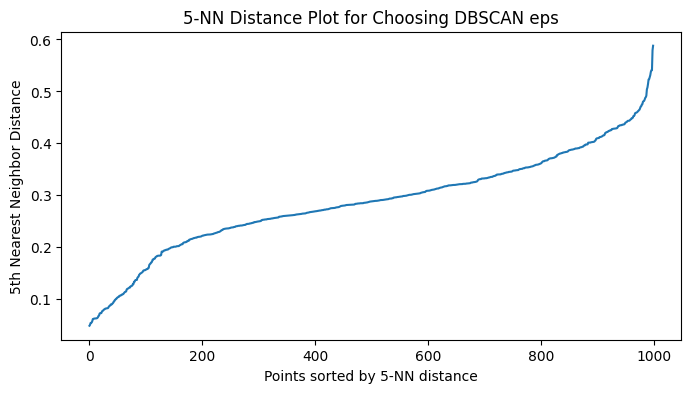

Number of clusters: 1
Number of noise points: 2


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import DBSCAN

# Compute the Pearson correlation distance matrix (1 - correlation coefficient)
# Pearson correlation similarity between rows, convert to distance
corr_matrix = np.corrcoef(images_flat)
dist_matrix = 1 - corr_matrix

# Compute the 5-nearest neighbors (k=5) using the distance matrix
neighbors = NearestNeighbors(n_neighbors=5, metric='precomputed')
neighbors.fit(dist_matrix)
distances, indices = neighbors.kneighbors(dist_matrix)

# Sort the 5-NN distances (take the 5th neighbor's distance for each point)
sorted_distances = np.sort(distances[:, 4])

# Plot the sorted 5-NN distance plot
plt.figure(figsize=(8, 4))
plt.plot(sorted_distances)
plt.xlabel('Points sorted by 5-NN distance')
plt.ylabel('5th Nearest Neighbor Distance')
plt.title('5-NN Distance Plot for Choosing DBSCAN eps')
plt.show()

# Choose an 'eps' value from the 5-NN plot
eps_value = 0.5

# Run DBSCAN with Pearson correlation distance
dbscan = DBSCAN(eps=eps_value, min_samples=5, metric='precomputed')
labels = dbscan.fit_predict(dist_matrix)

# Print the number of clusters and noise points (-1)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Number of clusters: {n_clusters}")
print(f"Number of noise points: {n_noise}")

# Utilizing DBSCAN for this type of data might not be most effective as it's well-suited to finding clusters of arbitrary shapes, unlike highly structured data like digit images. So I suppose the low clustering makes sense because of this.